**This code can be used to evaluate a self-organising map on new data or on the templates**

For an explanation on the templates, we refer to the documentation.  

The files and folders needed are: three Templates folders: regular, dml and eval with each three subfolders (arrays, dml, rect), the file 'parameters.txt' and the folder 'Modules' containing five modules with code. If *all* of these folders are located somewhere else, the remote control block can be run to change the working directory. If the folders were copied directly from Github, this shouldn't be necessary.

If new audio is used (not neccesary), the audio files to be used need to be copied to the folder 'Audio_data', which is present in the Data folder. Alternatively, a different pathway can be specified using the argument Audio_data=... 

The audio must be of the same type (no mixes of TE and non-TE). The code assumes data is normal, if it is TE, add an argument 'exp_factor' with the expansion factor. If there are multiple channels, add an argument channel='l' or 'r' (left or right). If there is metadata that cannot be parsed, add an argument 'sr' with the sampling rate.

Press shift+enter to run a block.

**Remote control block** (Optional. Use only if all data is present somewhere else).

In [ ]:
import os
path='C:/Users/arne/Documents/School/Thesis'; #Change this to directory that stores the data
os.chdir(path)

**Import necessary functions** (run unchanged)

In [1]:
import os
path=os.getcwd()
os.chdir(path+'/Modules')
import AD1_Loading as AD1
import AD2_Spectro as AD2
import AD3_Features as AD3
import AD4_SOM as AD4
import AD5_MDS as AD5
os.chdir(path)

**Prints out how many templates of each type there are.**

In [2]:
AD4.print_evaluate()

Regular templates: 
eser: 17
mdau: 6
nlei: 10
pnat: 18
ppip: 38
Total: 89
 
dml templates: 
eser: 10
mdau: 0
nlei: 0
pnat: 0
ppip: 11
Total: 21
 
Evaluation templates: 
eser: 0
mdau: 0
nlei: 0
pnat: 0
ppip: 0
Total: 0
 
Total templates: 
eser: 27
mdau: 6
nlei: 10
pnat: 18
ppip: 49
Total: 110


()

**Create a SOM-plot**

This code will fit a SOM and a corresponding dml on the templates (regular and dml). Every neuron is described using two coordinates on a two dimensional plot. All templates (regular, dml and eval) are then analysed as labeled datapoints. For every datapoint, a marker is plotted in a two dimensional plot on the location of the matching neuron. This can be used to evaluate graphically how well seperated different templates are. To see the performance on new data, regions can be saved as evaluate templates (eval). Regions that are present in multiple folders (regular, dml and eval) are plotted with the same marker. So if you want to evaluate the same bat in two different environment for example, it is recommended to give them a different name when saving them. 

The code can be customised with the following optional arguments:
* path: pathway to the data (use if templates are saved somewhere else)
* dim1 and dim2: dimensions SOM
* Full: fit the SOM on all data in Audio_data (if both Full and List_files are absent, the SOM is fitted on the templates)
* List_files: fit the SOM on a list of audio files in Audio data (if both Full and List_files are absent, the SOM is fitted on the templates)
* title: give a title to the plot
* export: save the plot
* fit eval: if set to True, the evaluation templates are also used to fit the SOM instead of only dml and regular templates
* SOM: load in an existing SOM
* dml: load in an existing dml
* plot_flag: if set to False, no plot is given

Initialisation complete (1/3)
DML complete (2/3)
SOM complete (3/3)


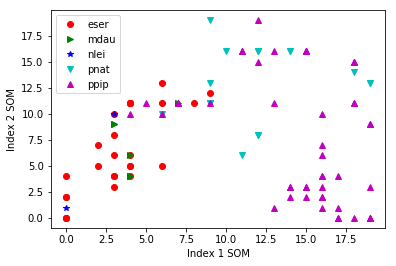

In [3]:
export_name='test_evaluation' #name under which you want to save the plot, this argument is optional
dim1=20 #size SOM
dim2=20 #size SOM
plot_flag=True #set to False if you do not want a plot
X_final, Y_final, net, D=AD4.evaluation_SOM(dim1=dim1, dim2=dim2, export=export_name, Plot_Flag=plot_flag)

**KNN and Cohen's kappa**

This block writes out the number of templates per species, the PA and the Cohen's kappa. The number of neighbors considered can be adapted with k.

In [4]:
k=3 #number of neighbors considered

PA, match_scores=AD4.KNN_calc(X_final, Y_final, D, K=k)
PE=AD4.calc_PE()
kappa=AD4.calc_kappa(PA, PE)
AD4.print_evaluate2(PA, kappa)

Species: Amount: PA: Cohen-kappa:
eser     27    0.6049382716049382 0.2796370667856611
mdau     6    0.05555555555555555 -0.002136752136752136
nlei     10    0.5666666666666667 0.4666666666666667
pnat     18    0.3333333333333333 0.13768115942028986
ppip     49    0.0 -0.8032786885245901


()